In [1]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt


from tqdm import tqdm

import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.compute as pc
import pyarrow.dataset as ds
import pyarrow.csv as csv
import pyarrow.json as json

from enum import Enum
import abc
from typing import List, Dict, Tuple, Any, Union

In [2]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_centers = 
from DB_lister import list_content, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()

In [3]:
sys.path.append('/groups/icecube/cyan/factory/DOMification')
from Enum.Flavour import Flavour
from Enum.EnergyRange import EnergyRange

In [4]:
root_dir = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied_filtered_second_round/Snowstorm/CC_CRclean_IntraTravelDistance_250/"

root_dir_11 = root_dir + "22011/"
root_dir_12 = root_dir + "22012/"

root_dir_14 = root_dir + "22014/"
root_dir_15 = root_dir + "22015/"

root_dir_17 = root_dir + "22017/"
root_dir_18 = root_dir + "22018/"

root_dir_31 = root_dir + "22031/" # new destination

# pmt_dir_11_1 = root_dir_11 + "1/"
# pmt_dir_12_1 = root_dir_12 + "1/"

truth_11_1 = root_dir_11 + "truth_1.parquet"
truth_12_1 = root_dir_12 + "truth_1.parquet"

truth_14_1 = root_dir_14 + "truth_1.parquet"
truth_15_1 = root_dir_15 + "truth_1.parquet"

truth_17_1 = root_dir_17 + "truth_1.parquet"
truth_18_1 = root_dir_18 + "truth_1.parquet"

In [5]:
np.sqrt(2000*20000)

6324.555320336759

In [6]:
print([d for d in os.listdir(root_dir_11) if os.path.isdir(os.path.join(root_dir_11, d))])

['1', '2', '8', '5', '7', '4', '10', '9', '3']


In [7]:
print([f for f in os.listdir(root_dir_11) if f.endswith(".parquet")])

['truth_8.parquet', 'truth_4.parquet', 'truth_10.parquet', 'truth_1.parquet', 'truth_5.parquet', 'truth_9.parquet', 'truth_3.parquet', 'truth_7.parquet', 'truth_2.parquet']


In [8]:
def convertParquetToDF(file:str) -> pd.DataFrame:
    table = pq.read_table(file)
    df = table.to_pandas()
    return df

In [9]:
def isClean(df:pd.DataFrame) -> bool:
    return not df.isna().any().any()

In [10]:
df_11_1 = convertParquetToDF(truth_11_1)
df_12_1 = convertParquetToDF(truth_12_1)

In [11]:
df_11_1

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,...,TotalColumnDepthCGS,TotalPrimaryWeight,TotalWeight,TotalXsectionCGS,TrueActiveLengthAfter,TrueActiveLengthBefore,TypeWeight,max_interPMT_distance,isWithinIceCube,lepton_intra_distance
0,111000100000002,2,11,1,1,32,32,19012.628906,2.446139,2.935971,...,1.664943e+06,1.0,0.000024,9.336015e-35,967.824585,6522.270996,0.5,855.056519,0,1059.295654
1,111000100000003,3,11,1,1,114,146,193913.015625,0.011026,0.919336,...,3.077045e+05,1.0,0.000076,4.115322e-34,822.320068,2573.304199,0.5,685.891113,1,370.513672
2,111000100000005,5,11,1,1,19,165,17603.115234,4.503489,1.431804,...,1.271487e+06,1.0,0.000071,9.392356e-35,909.837891,13132.682617,0.5,688.073242,0,918.767273
3,111000100000021,21,11,1,1,55,220,408035.218750,4.192132,2.582735,...,2.276407e+06,1.0,0.000069,1.878818e-34,812.263428,9171.940430,0.5,569.121399,0,446.005035
4,111000100000033,33,11,1,1,264,484,15746.131836,2.657743,2.890188,...,1.353735e+06,1.0,0.000003,5.515834e-35,1070.123169,5258.517090,0.5,1118.044556,0,959.229919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67313,111000100400536,400536,11,1,21,31,16006,37237.261719,1.884330,2.301941,...,2.017838e+06,1.0,0.000145,1.202529e-34,900.402161,7861.114746,0.5,601.691650,0,674.817932
67314,111000100400547,400547,11,1,21,77,16083,15337.049805,1.214424,1.496208,...,1.586671e+06,1.0,0.000081,8.487740e-35,930.397888,16286.360352,0.5,1079.677734,0,1098.902222
67315,111000100400550,400550,11,1,21,57,16140,12519.680664,1.475594,3.013499,...,1.512096e+06,1.0,0.000045,5.022740e-35,915.737183,5981.908203,0.5,784.479431,0,1045.873413
67316,111000100400552,400552,11,1,21,29,16169,11854.662109,0.181398,1.244628,...,5.378256e+05,1.0,0.000015,4.809901e-35,848.029602,5095.112793,0.5,436.131714,1,539.458435


In [12]:
df_12_1

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,...,TotalColumnDepthCGS,TotalPrimaryWeight,TotalWeight,TotalXsectionCGS,TrueActiveLengthAfter,TrueActiveLengthBefore,TypeWeight,max_interPMT_distance,isWithinIceCube,lepton_intra_distance
0,112000100000006,6,12,1,1,1071,1071,3.670788e+06,4.457279,0.701368,...,3.653102e+05,1.0,3.750276e-04,1.717568e-33,1105.433838,2687.593018,0.5,1023.409241,1,383.836761
1,112000100000010,10,12,1,1,252,1323,2.928983e+07,2.781825,1.309062,...,6.062522e+05,1.0,1.493867e-03,4.122190e-33,863.243591,5847.835449,0.5,1026.477051,0,736.449341
2,112000100000017,17,12,1,1,334,1657,4.015983e+07,3.086867,1.549579,...,5.323734e+06,1.0,1.470618e-02,4.676198e-33,943.018860,56868.835938,0.5,1145.506836,0,1018.752136
3,112000100000044,44,12,1,1,298,1955,6.502050e+06,1.396962,1.382517,...,9.476354e+05,1.0,1.249633e-03,2.206342e-33,867.015686,9598.517578,0.5,1074.671997,0,801.945312
4,112000100000054,54,12,1,1,26,1981,1.615565e+07,0.233710,1.616700,...,4.881714e+06,1.0,9.355243e-03,3.225694e-33,935.913879,38541.757812,0.5,619.220886,0,859.519714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,112000100029357,29357,12,1,15,1073,96540,1.014017e+07,2.067528,0.235023,...,2.870003e+05,1.0,4.543297e-04,2.648076e-33,992.672058,1987.235962,0.5,1243.462524,0,1066.704224
3767,112000100029362,29362,12,1,15,392,96932,1.794552e+06,2.906128,2.910149,...,2.903096e+06,1.0,2.065588e-08,4.170369e-34,1018.672180,11150.628906,0.5,1179.754517,0,1065.375122
3768,112000100029369,29369,12,1,15,124,97056,3.091663e+06,2.050184,1.184187,...,4.249452e+05,1.0,4.037663e-04,1.589538e-33,752.795044,3949.443604,0.5,698.764526,0,338.311218
3769,112000100029384,29384,12,1,15,32,97088,1.297350e+07,2.180361,2.612760,...,2.340163e+06,1.0,2.999776e-09,2.323477e-34,1032.625610,9167.044922,0.5,915.793213,0,926.694275


In [13]:
def get_n_events(parquet_file: str) -> int:
    table = pq.read_table(parquet_file)
    return table.num_rows

In [14]:
def get_n_events_in_dir(dir: str) -> int:
    n_events = 0
    for filename in os.listdir(dir):
        if filename.endswith(".parquet"):
            parquet_file = os.path.join(dir, filename)
            n_events_truth = get_n_events(parquet_file)
            n_events += n_events_truth
            print(f"File: {filename}, Number of events: {n_events_truth}")
    return n_events
    

In [15]:
print(f"22011: {get_n_events_in_dir(root_dir_11):,}")
print(f"22012: {get_n_events_in_dir(root_dir_12):,}")
print(f"22014: {get_n_events_in_dir(root_dir_14):,}")
print(f"22015: {get_n_events_in_dir(root_dir_15):,}")   
print(f"22017: {get_n_events_in_dir(root_dir_17):,}")
print(f"22018: {get_n_events_in_dir(root_dir_18):,}")


File: truth_8.parquet, Number of events: 67098
File: truth_4.parquet, Number of events: 68022
File: truth_10.parquet, Number of events: 12966
File: truth_1.parquet, Number of events: 67318
File: truth_5.parquet, Number of events: 67109
File: truth_9.parquet, Number of events: 67159
File: truth_3.parquet, Number of events: 67148
File: truth_7.parquet, Number of events: 67485
File: truth_2.parquet, Number of events: 66983
22011: 551,288
File: truth_16.parquet, Number of events: 3879
File: truth_12.parquet, Number of events: 3857
File: truth_6.parquet, Number of events: 3762
File: truth_2.parquet, Number of events: 3734
File: truth_24.parquet, Number of events: 3881
File: truth_20.parquet, Number of events: 3826
File: truth_25.parquet, Number of events: 3802
File: truth_21.parquet, Number of events: 3856
File: truth_17.parquet, Number of events: 3815
File: truth_13.parquet, Number of events: 3900
File: truth_7.parquet, Number of events: 3824
File: truth_3.parquet, Number of events: 3815
F

In [16]:
def get_n_selected_events(parquet_file:str) -> int:
    energy_cutoff = 1e5
    table = pq.read_table(parquet_file, columns=["energy"])
    mask = pc.greater(table["energy"], energy_cutoff)
    filtered = table.filter(mask)
    return filtered.num_rows
    

In [17]:
def get_n_selected_events_in_dir(dir:str) -> int:
    n_events = 0
    for filename in os.listdir(dir):
        if filename.endswith(".parquet"):
            parquet_file = os.path.join(dir, filename)
            n_events_truth = get_n_selected_events(parquet_file)
            n_events += n_events_truth
            # print(f"File: {filename}, Number of events: {n_events_truth}")
    return n_events

In [18]:
print(f"22011: {get_n_selected_events_in_dir(root_dir_11):,}")
print(f"22012: {get_n_selected_events_in_dir(root_dir_12):,}")
print(f"22014: {get_n_selected_events_in_dir(root_dir_14):,}")
print(f"22015: {get_n_selected_events_in_dir(root_dir_15):,}")
print(f"22017: {get_n_selected_events_in_dir(root_dir_17):,}")
print(f"22018: {get_n_selected_events_in_dir(root_dir_18):,}")

22011: 165,226


22012: 96,138
22014: 27,498
22015: 24,857
22017: 31,413
22018: 30,123


22011: 165,226
22012: 96,138
22014: 27,498
22015: 24,857
22017: 31,413
22018: 30,123

nu_e = 27,498 + 24,857  = 52,355
nu_mu = 96,138 + 165,226 = 261,364
nu_tau = 31,413 + 30,123 = 61,536

m ratio e: 27,498 / 52,355 = 0.524
m ratio mu: 96,138 / 261,364 = 0.368
m ratio tau: 31,413 / 61,536 = 0.511

h ratio e: 24,857 / 52,355 = 0.475
h ratio mu: 165,226 / 261,364 = 0.632
h ratio tau: 30,123 / 61,536 = 0.489

In [19]:
def write_filtered_truth_table(table: pa.Table, 
                               energy_cutoff: float,
                               output_path: str) -> None:
    if "energy" not in table.column_names:
        raise ValueError("'energy' column not found in table.")

    mask = pc.greater(table["energy"], energy_cutoff)
    filtered = table.filter(mask)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    pq.write_table(filtered, output_path)


In [20]:
def get_histogram_dNdE(energies, bins):
    weights = np.ones_like(energies)
    return np.histogram(energies, bins=bins, weights=weights)

def get_histogram_EdNdE(energies, bins):
    weights = energies  # weighting by E
    return np.histogram(energies, bins=bins, weights=weights)

def get_histogram_E2dNdE(energies, bins):
    weights = energies ** 2  # weighting by E²
    return np.histogram(energies, bins=bins, weights=weights)


In [21]:
def linear(x, coeff, offset):
    return coeff*x + offset

In [22]:
def get_combined_energy_distribution_from_truth_files(
    truth_file_low: str,
    truth_file_high: str,
    weight_function: object,
    title: str = None,
    Nbins: int = 50,
    energy_cutoff: float = 1e5,
):
    truth_low = pq.read_table(truth_file_low).to_pandas()
    truth_high = pq.read_table(truth_file_high).to_pandas()

    # 🔥 Apply cutoff to low-energy group
    energies_high = truth_high["energy"]
    energies_low = truth_low["energy"]
    energies_low = energies_low[energies_low > energy_cutoff]
    energies_low = energies_low[:len(energies_high)]

    combined_energies = np.concatenate([energies_low, energies_high])
    Nbins, binwidth, bins, _, bin_centers = getHistoParam(combined_energies, Nbins=Nbins, isLog=True)

    counts_low, _ = weight_function(energies_low, bins)
    counts_high, _ = weight_function(energies_high, bins)
    # counts_low, _ = np.histogram(energies_low, bins=bins)
    # counts_high, _ = np.histogram(energies_high, bins=bins)

    log_x = np.log10(bin_centers)

    fig, ax = plt.subplots(figsize=(18, 13))
    ax.hist(energies_low, bins=bins, histtype='step', lw=2, color=getColour(1), label=r'100TeV-1PeV')
    ax.hist(energies_high, bins=bins, histtype='step', lw=2, color=getColour(0), label=r'1PeV-100PeV')

    for i, (counts, label, color) in enumerate([(counts_low, r'100TeV-1PeV', getColour(3)), (counts_high, r'1PeV-100PeV', getColour(2))]):
        valid_mask = counts > 0
        x = log_x[valid_mask]
        y = np.log10(counts[valid_mask])
        sigma = 1 / np.sqrt(counts[valid_mask])

        popt, pcov = opt.curve_fit(linear, x, y, sigma=sigma, absolute_sigma=True)
        slope, intercept = popt
        y_fit = 10 ** linear(x, *popt)
        ax.plot(10 ** x, y_fit, linestyle='--', color=color,
                label=f'{label} Fit: $y = {slope:.2f}x + {intercept:.2f}$')

        chi2 = np.sum(((y - linear(x, *popt)) / sigma) ** 2)
        dof = len(x) - len(popt)
        pval = stats.chi2.sf(chi2, dof)

        add_text_to_ax(
            0.2 + 0.25*i, 0.95,
            nice_string_output({
                f'{label}': "",
                f'N': f"{np.sum(counts):,.0f}",
                f'slope': f"{slope:.3f}",
                f'χ²': f"{chi2:.2f}",
                f'DOF': f"{dof}",
                f'p': f"{pval:.3f}",
            }),
            ax,
            fontsize=12,
        )

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$\log_{10}(\mathrm{energy})$')
    ax.set_ylabel('Counts')
    ax.set_title(title or 'Energy distribution comparison')
    ax.legend()

    return fig, ax


(<Figure size 1800x1300 with 1 Axes>,
 <Axes: title={'center': 'Differential Energy distribution for $\\nu_\\mu$'}, xlabel='$\\log_{10}(\\mathrm{energy})$', ylabel='Counts'>)

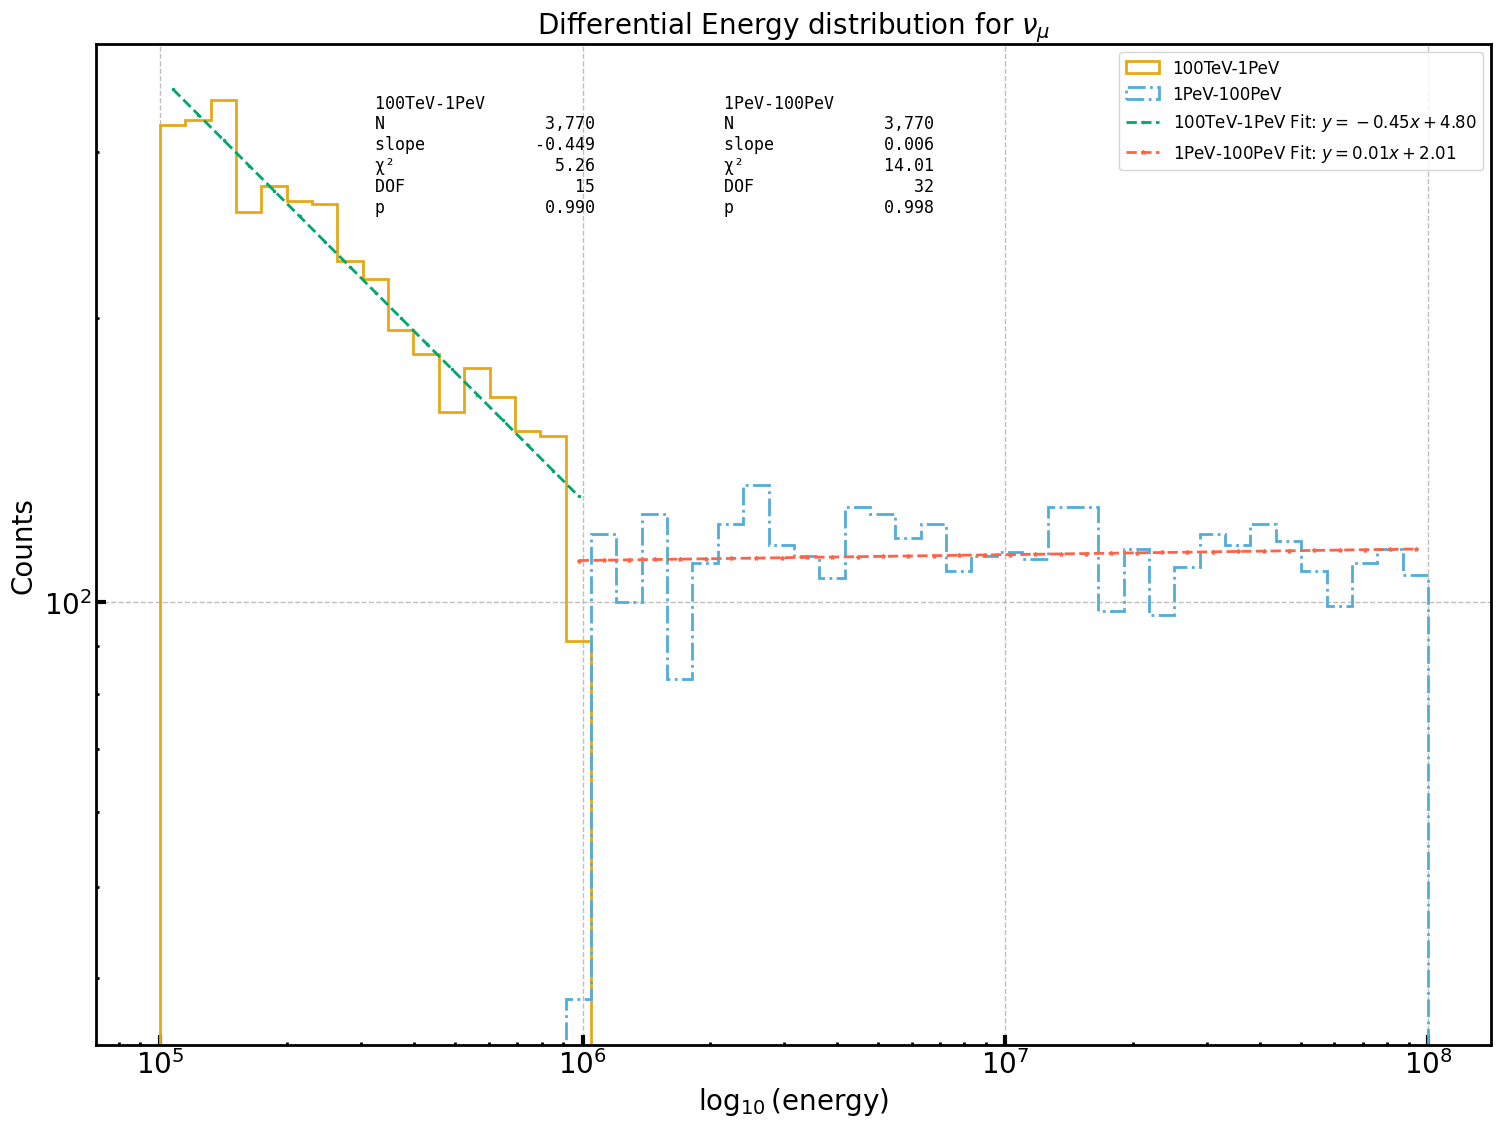

In [23]:
get_combined_energy_distribution_from_truth_files(
    truth_file_low= truth_11_1,
    truth_file_high= truth_12_1,
    weight_function=get_histogram_dNdE,
    title = f"Differential Energy distribution for $\\nu_\\mu$")

In [24]:
# get_combined_energy_distribution_from_truth_files(
#     truth_file_low= truth_11_1,
#     truth_file_high= truth_12_1,
#     weight_function=get_histogram_EdNdE,
#     title = f"Energy distribution for $\\nu_e$")

In [25]:
# get_combined_energy_distribution_from_truth_files(
#     truth_file_low= truth_11_1,
#     truth_file_high= truth_12_1,
#     weight_function=get_histogram_E2dNdE,
#     title = f"Energy distribution for $\\nu_e$")

(<Figure size 1800x1300 with 1 Axes>,
 <Axes: title={'center': 'Differential Energy distribution for $\\nu_e$'}, xlabel='$\\log_{10}(\\mathrm{energy})$', ylabel='Counts'>)

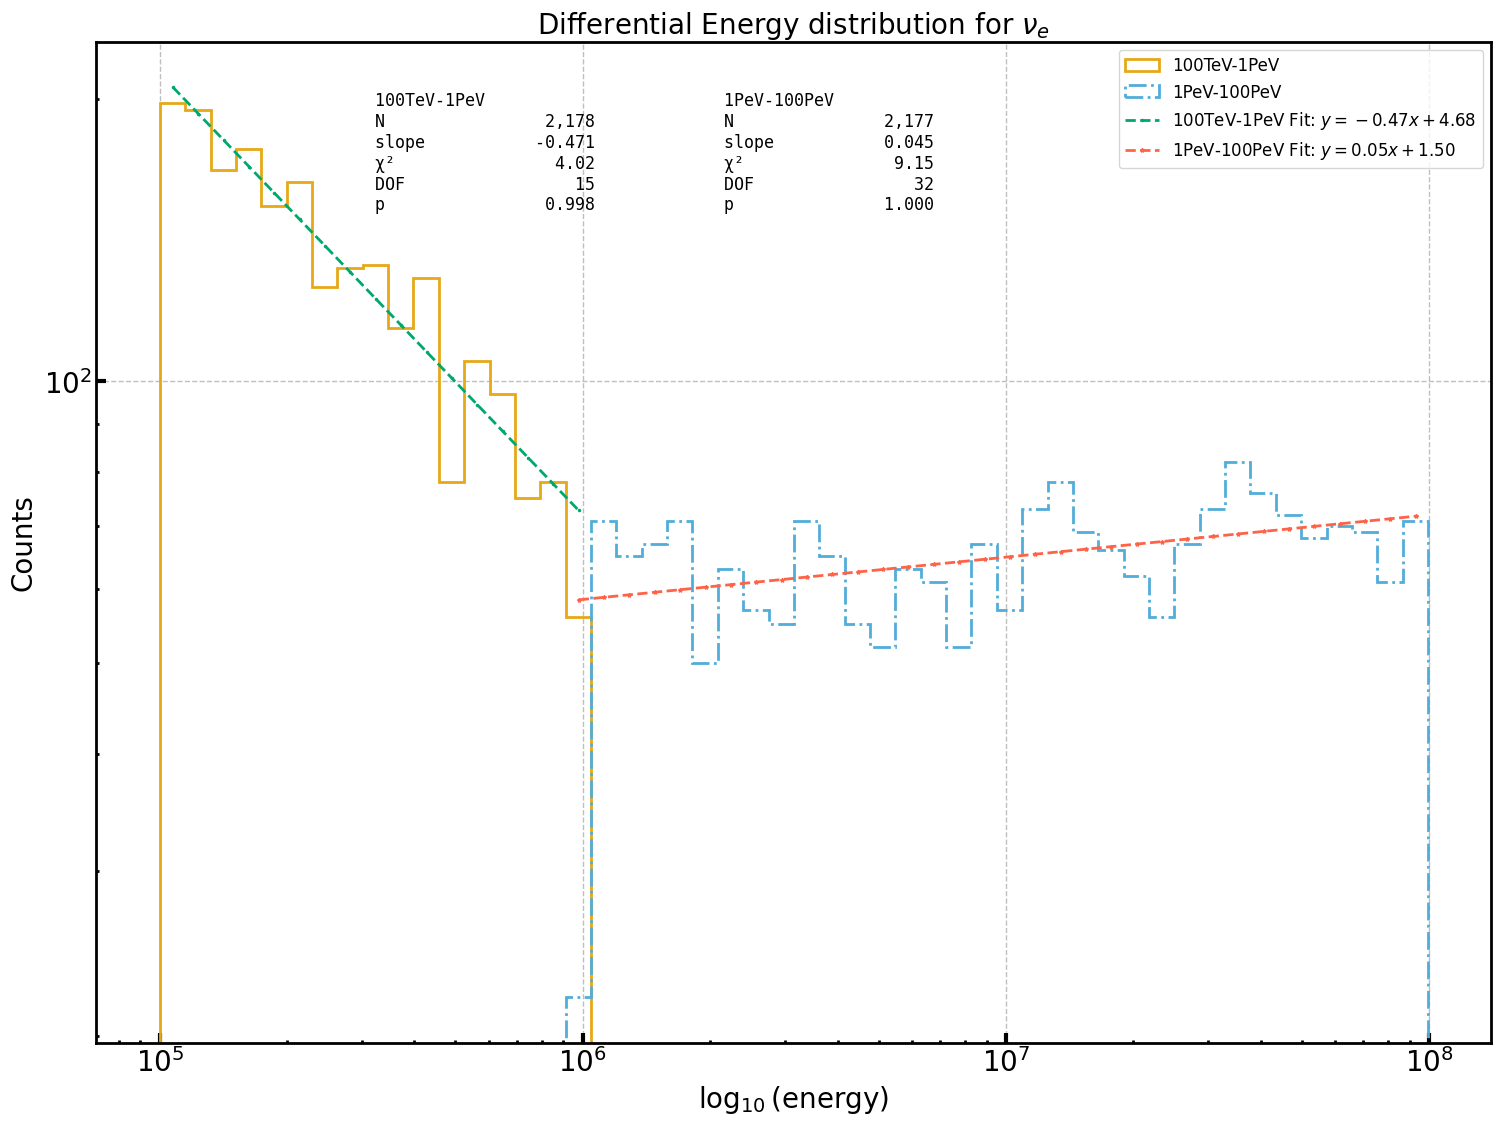

In [26]:
get_combined_energy_distribution_from_truth_files(
    truth_file_low= truth_14_1,
    truth_file_high= truth_15_1,
    weight_function=get_histogram_dNdE,
    title = f"Differential Energy distribution for $\\nu_e$")

(<Figure size 1800x1300 with 1 Axes>,
 <Axes: title={'center': 'Differential Energy distribution for $\\nu_\\tau$'}, xlabel='$\\log_{10}(\\mathrm{energy})$', ylabel='Counts'>)

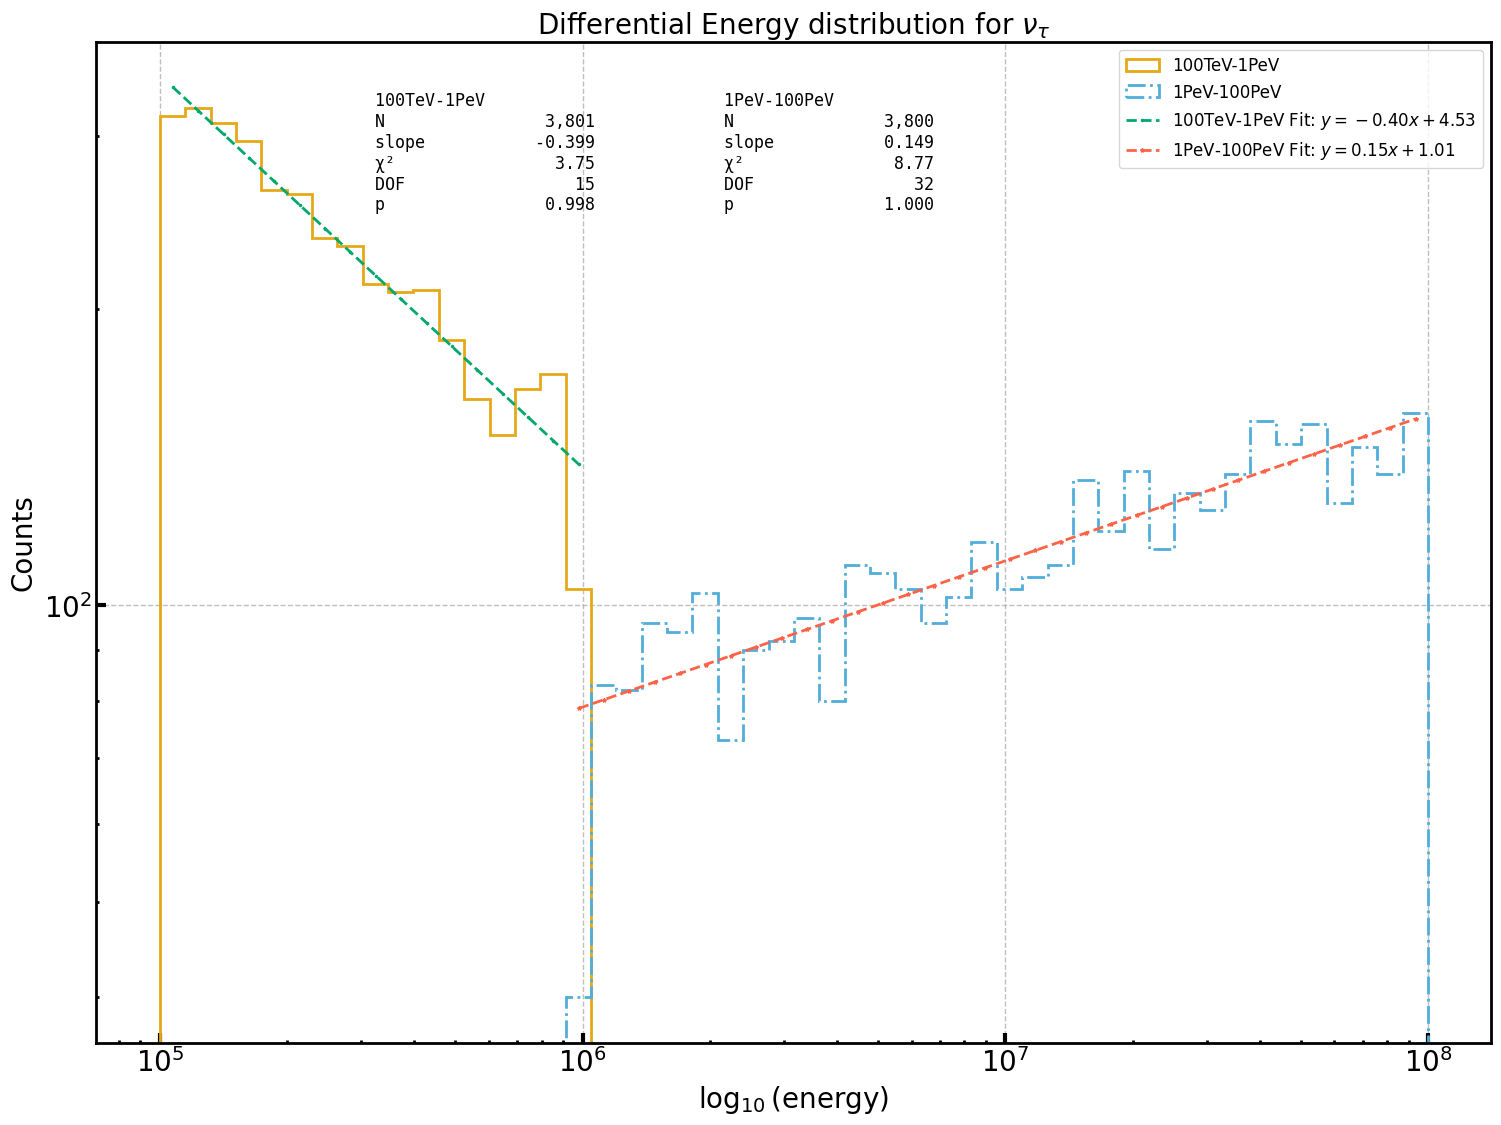

In [27]:
get_combined_energy_distribution_from_truth_files(
    truth_file_low= truth_17_1,
    truth_file_high= truth_18_1,
    weight_function=get_histogram_dNdE,
    title = f"Differential Energy distribution for $\\nu_\\tau$")